In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('Electric_vehicles_sales_india.csv')

In [3]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
Year                 96845 non-null float64
Month_Name           96845 non-null object
Date                 96845 non-null object
State                96845 non-null object
Vehicle_Class        96845 non-null object
Vehicle_Category     96845 non-null object
Vehicle_Type         96845 non-null object
EV_Sales_Quantity    96845 non-null float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [5]:
df.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [6]:
# Check for missing values
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [7]:
df.dtypes

Year                 float64
Month_Name            object
Date                  object
State                 object
Vehicle_Class         object
Vehicle_Category      object
Vehicle_Type          object
EV_Sales_Quantity    float64
dtype: object

In [8]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.dtypes

Year                        float64
Month_Name                   object
Date                 datetime64[ns]
State                        object
Vehicle_Class                object
Vehicle_Category             object
Vehicle_Type                 object
EV_Sales_Quantity           float64
dtype: object

In [10]:
categorical_columns = ['Month_Name', 'State', 'Vehicle_Class',
'Vehicle_Category', 'Vehicle_Type']
df[categorical_columns] = df[categorical_columns].astype('category')

In [11]:
# Fill missing values (if any) using median for numerical columns or mode for categorical columns
df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median()
, inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)


In [12]:
df.dtypes

Year                        float64
Month_Name                 category
Date                 datetime64[ns]
State                      category
Vehicle_Class              category
Vehicle_Category           category
Vehicle_Type               category
EV_Sales_Quantity           float64
dtype: object

In [13]:
#Visualize the dataset with libraries
import matplotlib.pyplot as plt
import seaborn as sns

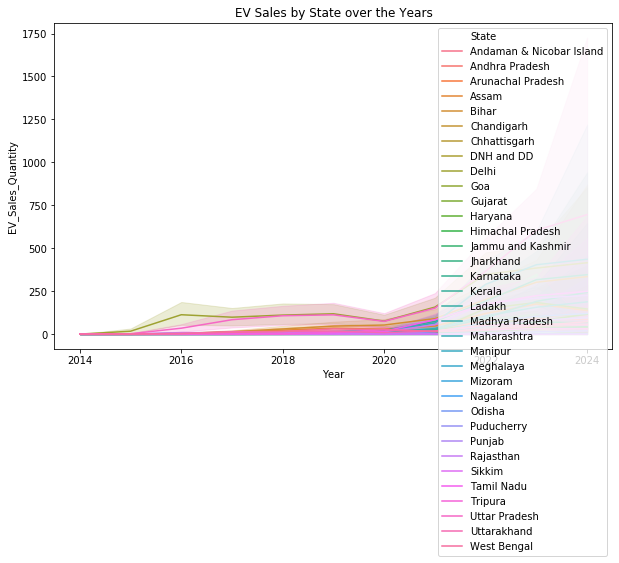

In [14]:
# Plot EV sales over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity',
hue='State')
plt.title('EV Sales by State over the Years')
plt.show()

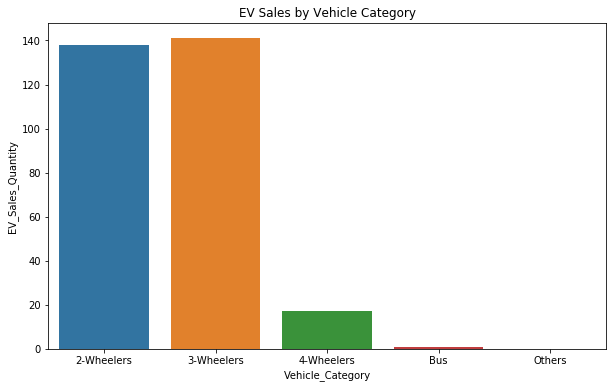

In [15]:
# Plot sales by vehicle category
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity',
data=df, ci=None)
plt.title('EV Sales by Vehicle Category')
plt.show()

In [16]:
# Extract Month and Day from the Date column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [17]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['State',
'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'],
drop_first=True)

In [18]:
# Drop unnecessary columns like Date, Month_Name
df_encoded.drop(['Date', 'Month_Name'], axis=1, inplace=True)

In [19]:
#Use a Regression Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [20]:
# Split the data into features and target variable
X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [22]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100,
random_state=42)

In [23]:
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 130.58175227721011


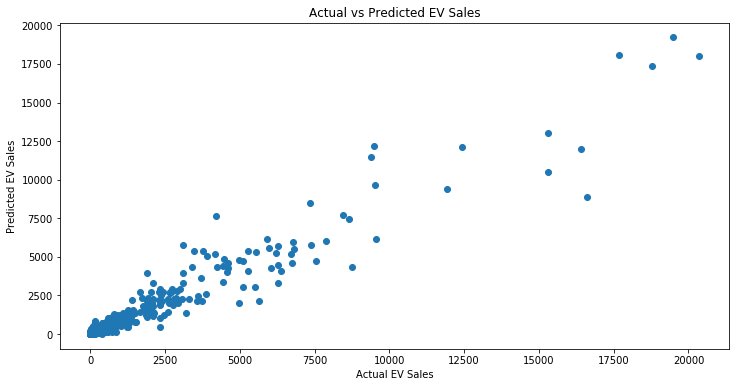

In [25]:
# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.show()

In [26]:
# Check feature importance
importance = model.feature_importances_
feature_importance = pd.Series(importance,
index=X_train.columns).sort_values(ascending=False)

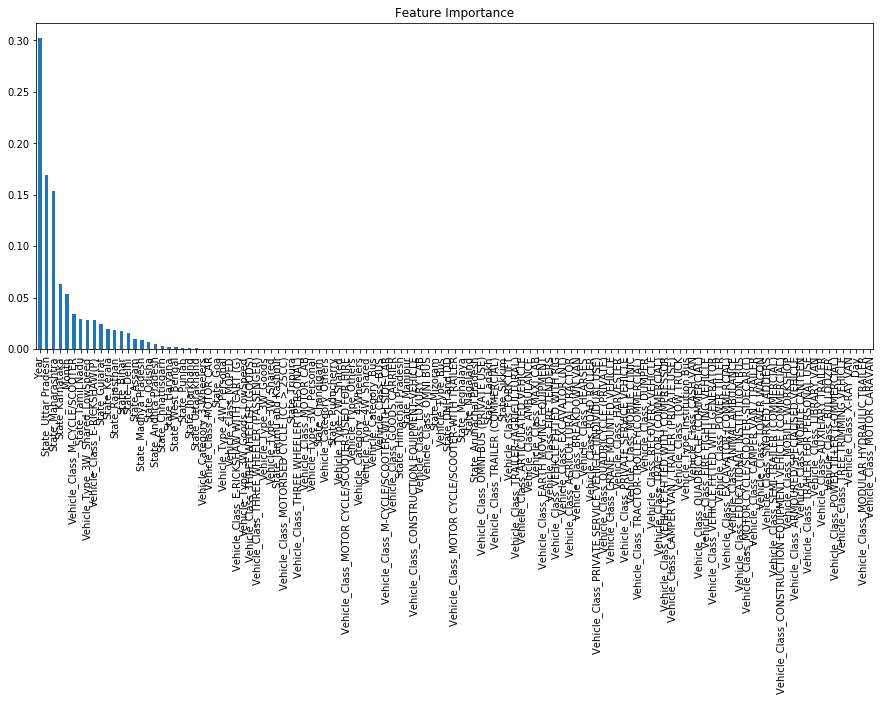

In [27]:
# Plot the most important features
plt.figure(figsize=(15, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

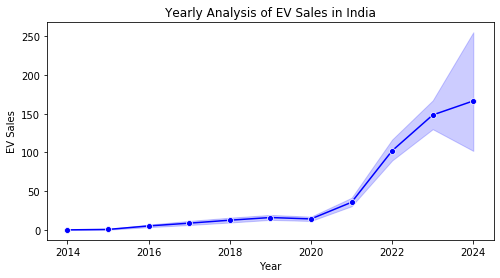

In [28]:
plt.figure(figsize=(8,4))
plt.title('Yearly Analysis of EV Sales in India')
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df,
marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('EV Sales');

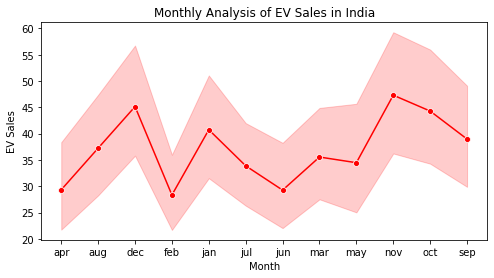

In [29]:
plt.figure(figsize=(8,4))
plt.title('Monthly Analysis of EV Sales in India')
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df,
marker='o', color='r')
plt.xlabel('Month')
plt.ylabel('EV Sales');

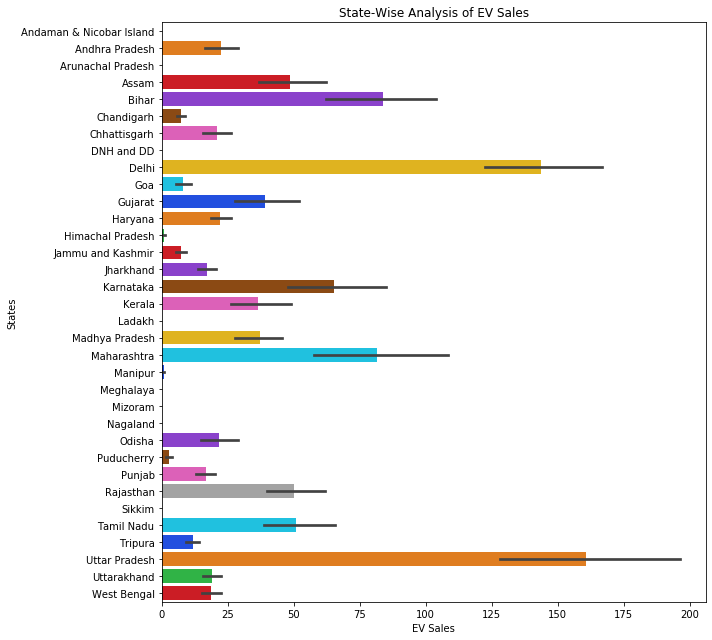

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 9))
plt.title('State-Wise Analysis of EV Sales')
sns.barplot(y='State', x='EV_Sales_Quantity', data=df, palette='bright')
plt.xlabel('EV Sales')
plt.ylabel('States')
plt.tight_layout()
plt.show()

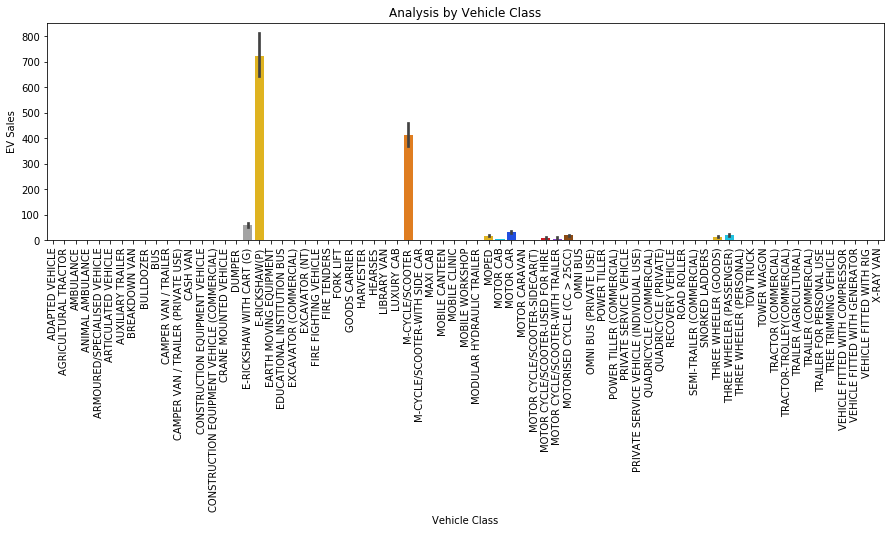

In [31]:
plt.figure(figsize=(15, 4))
sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity', data=df, palette='bright')
plt.title('Analysis by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('EV Sales')
plt.xticks(rotation=90)
plt.show()

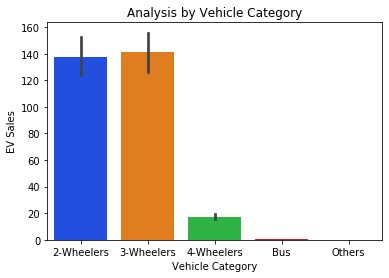

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Category',
y='EV_Sales_Quantity',data=df,
palette='bright')
plt.title('Analysis by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales')
plt.xticks(rotation=0);

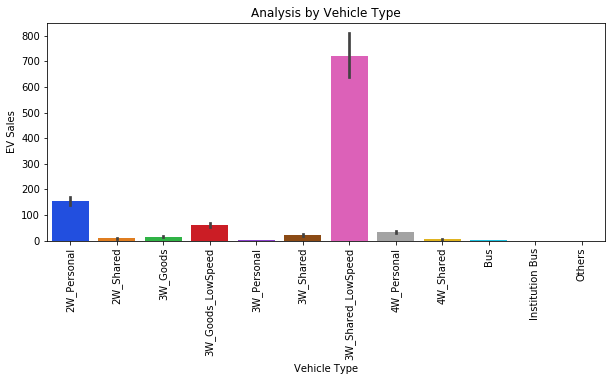

In [33]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=df, palette='bright')
plt.title('Analysis by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.xticks(rotation=90)
plt.show()